<a href="https://colab.research.google.com/github/Raphael-Vargas-Moya/IA/blob/main/Assignments/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Processing Datasets in Python

*   Joshua Abdiel Bahena Piedras           2018505
*   Jared Gutierrez Contreras              2131945
*   Raphaël Vargas Moya                    2132207
*   Dora Jazmín González Díaz              2049427
*   Diego Eduardo Rodríguez Arreguín       2004407

Artificial Intelligence - LMVN2 - Biomedical Engineering



---



# **PART 1**



First of all, we loaded the libraries that we will use along the activity so that we don't get any errors for calling functions that don't exist or something along those lines.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

1. Load the dataset using the library Pandas.

For the loading of the dataset, we first downloaded the file "diabetes.csv" from the kaggle database provided link, which will be our dataset, and since we are working in Google Colab which uses virtual machines that reset the files each time, and since mounting Google Drive doesn't link the file to every member of the Team, we chose to upload the dataset file to the GitHub Repository of one of the members of the team, from wich we would get the file with the Unix comand "wget" (which is why we included the "!" at the start, so that Colab knows that it's not Python code) and save it to the "/content" directory of the notebook, which is available to anyone with access to the notebook. Finally, we read the csv file with the "pandas.read_csv" function to a variable called "df" (which stands for Data Frame).

In [ ]:
# Source: https://github.com/Raphael-Vargas-Moya/IA/blob/main/Assignments/Assignment_2/diabetes.csv

!wget https://raw.githubusercontent.com/Raphael-Vargas-Moya/IA/refs/heads/main/Assignments/Assignment_2/diabetes.csv -O /content/diabetes.csv
df = pd.read_csv('/content/diabetes.csv')

--2025-09-06 05:43:51--  https://raw.githubusercontent.com/Raphael-Vargas-Moya/IA/refs/heads/main/Assignments/Assignment_2/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘/content/diabetes.csv’

/content/diabetes.c 100%[===================>]  23.31K  --.-KB/s    in 0.003s  

2025-09-06 05:43:51 (8.61 MB/s) - ‘/content/diabetes.csv’ saved [23873/23873]



2. Display the first 20 rows of the dataset.

For this part, we use the "pandas.DataFrame.head" function to get the first 20 rows of the data frame, and the "print" function to display them.

In [ ]:
print(df.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

3. Identify inconsistent values and count them in each column.

For this part, we first checked that there were none Null values (like Null, NaN, etc.) in the dataframe with the "isnull" function and the summed the ammount of the found values that matched the criteria with the "sum" function, and then we displayed it with a print.

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


As we can see, there are no empty cells or null values in the dataset, so then we later chequed for "0" (zero) values in each column similarly to the previous step.

In [ ]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


And we found a considerable number of "0"s in columns that should't have them; for example, we expect to see values of 0 in colums like "Pregnancies" or "Outcome", but that's not the case in columns like "Glucose", "BloodPressure", "BMI", "SkinThickness" or "Insulin", in which there doesn't make sense to have values of 0. This problem will be solved later as the activity progresses.

4. Generating descriptive statistics

As a last step for the "Part 1", we use the function "pandas.DataFrame.describe" to generate rough descriptive statistics of the dataset.

In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  



---



# **PART 2**

1. Replace zero values in attribute columns with the median of each column.

**The code cleans the dataset by replacing zeros with the column mean, and then displays the first rows of the modified DataFrame.**

This code iterates through every column in the created array "invalidColumns" that, as the name suggests, contais the invalid columns of the data frame, which are those that have 0's where they should
n't.

For each column, it replaces all occurrences of the value 0 with the median of that same column.  As we can see, there are "0" in columns that shouldn't be. That's why, we can not have a median value in the column such as "Pregnancies" or "Outcome" (as we mentioned in part 1).


After processing all columns, it prints the first ten rows of the updated DataFrame using df.head().



In [ ]:
# If there are null values we can choose to fill them with the mean
invalidColumns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in invalidColumns:
    df[column] = df[column].replace(0, df[column].median())

print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   
5            5      116             74             23     30.5  25.6   
6            3       78             50             32     88.0  31.0   
7           10      115             72             23     30.5  35.3   
8            2      197             70             45    543.0  30.5   
9            8      125             96             23     30.5  32.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

2. Normalize numerical data using Min-Max Scaling.

In this step, Min-Max normalization was applied to adjust all the values of the dataset to a common scale between 0 and 1. This method works by taking each value, subtracting the minimum value of its column, and then dividing by the difference between the maximum and minimum of that column. As a result, the smallest value becomes 0, the largest becomes 1, and all other values are mapped proportionally within this range. The operation was applied to the entire DataFrame at once, so every column was normalized simultaneously. Finally, the normalized dataset was stored in a new variable called df\_normalization and then printed to display the rescaled values.


In [ ]:
# Min-Max normalization scale values between 0 and 1
df_normalization = (df - df.min()) / (df.max() - df.min())
print(df_normalization)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.019832  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.019832  0.171779   
2       0.470588  0.896774       0.408163       0.173913  0.019832  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.445652  0.199519  0.300613   
764     0.117647  0.503226       0.469388       0.217391  0.019832  0.380368   
765     0.294118  0.496774       0.489796       0.173913  0.117788  0.163599   
766     0.058824  0.529032       0.367347       0.173913  0.019832  0.243354   
767     0.058824  0.316129       0.469388       0.260870  0.019832  0.249489   

     DiabetesPedigreeFunction       Age



---



# **PART 3**

1. Histogram of glucose levels before and after normalization.

This code selects the Glucose column from the dataset and creates a histogram to visualize the distribution of glucose levels before normalization, and in the same way to the glucose levels after normalization.

*   bins = 30 divides the data into 30 intervals for better detail.
*   color='green' and alpha=0.7 give the bars a green color with some transparency.
*   The plot is given a title and labeled axes for clarity.
*   Finally, plt.show() displays the histogram.



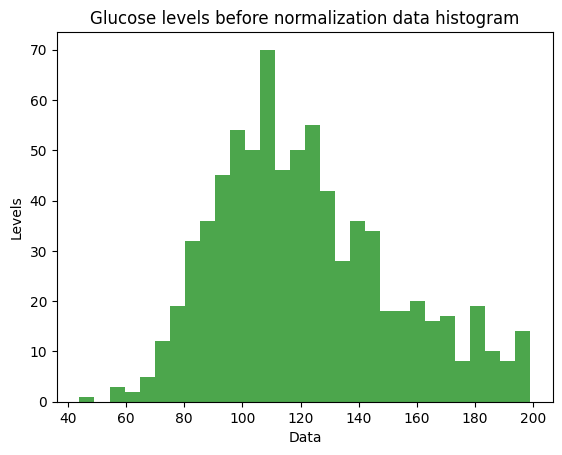

In [ ]:
datos = df['Glucose']  # Select only the 'Glucose' column
plt.hist(datos, bins=30, color='green', alpha=0.7)  # Draws the histogram
plt.title("Glucose levels before normalization data histogram")  # Title
plt.xlabel("Data")  # Label for the x-axis
plt.ylabel("Levels")  # Label for the y-axis
plt.show()  # Shows the graph

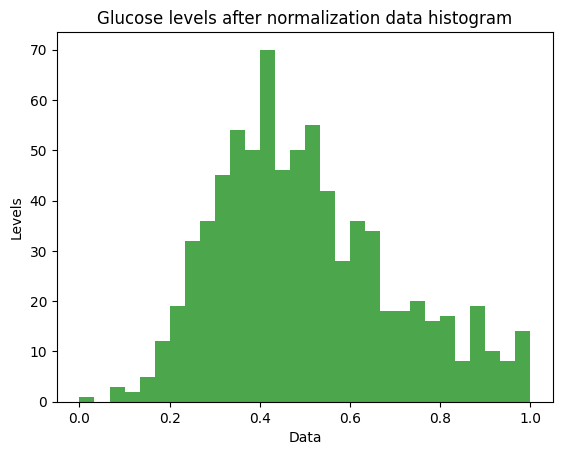

In [ ]:
datos = df_normalization['Glucose']  # Select only the 'Glucose' column
plt.hist(datos, bins=30, color='green', alpha=0.7)  # Draws the histogram
plt.title("Glucose levels after normalization data histogram")  # Title
plt.xlabel("Data")  # Label for the x-axis
plt.ylabel("Levels")  # Label for the y-axis
plt.show()  # Shows the graph

2. Boxplot to identify outliers in blood pressure.

In this phase we create a boxplot of the BloodPressure column in the dataset to identify the distribution of blood pressure values and detect possible outliers.

*   plt.figure() → Opens a new figure so the plot is independent.
*   plt.boxplot(df['BloodPressure'], vert=False, patch_artist=True) → Draws the boxplot:

       *   df['BloodPressure'] → the column we want to analyze.
       *   vert=False → makes the boxplot horizontal instead of vertical.
       *   patch_artist=True → allows the box to be filled with color (if styles are added).

*   plt.xlabel("Blood Pressure") → Labels the x-axis.











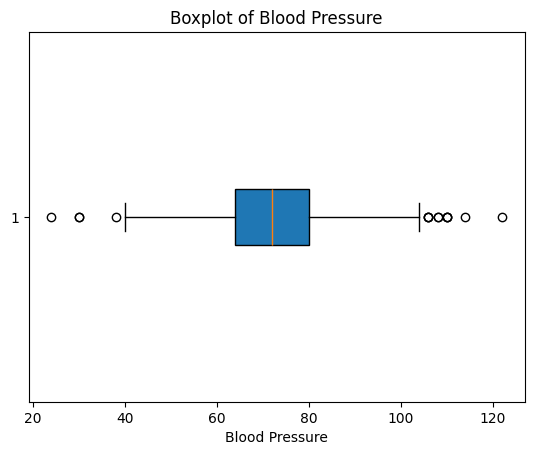

In [ ]:
# 2) Boxplot to identify outliers in Blood Pressure
plt.figure()
plt.boxplot(df['BloodPressure'], vert=False, patch_artist=True)
plt.title("Boxplot of Blood Pressure")
plt.xlabel("Blood Pressure")
plt.show()

We can identify the outliners represented as circle dots in the boxplot.

3. Scatter plot between Glucose and BMI to analyze correlation.

First, the data was cleaned just in case as an example by removing the rows with missing values in the Glucose and BMI columns to avoid errors in the model. Then, the variables were defined: X contains the glucose values (independent variable) and Y the BMI values (dependent variable).

With these variables, a linear regression model (LinearRegression) was trained to fit a line that best represents the relationship between them. Afterwards, the predictions (y_pred) were calculated, and two elements were plotted: the real data as a red scatter plot and the fitted line in blue, visually showing the correlation between both variables.

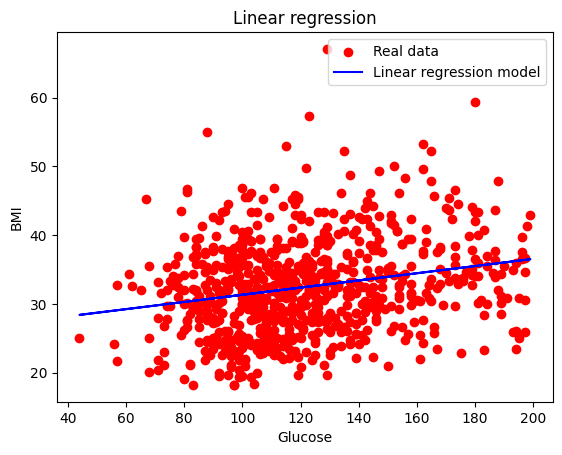

In [ ]:
# 3) Scatter plot between Glucose and BMI to analyze correlation
# Drop rows with NaN values before performing linear regression
df_cleaned = df.dropna(subset=['Glucose', 'BMI'])

X = df_cleaned[["Glucose"]].values
Y = df_cleaned [ ["BMI" ]]. values

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)

plt.scatter(X,Y, color = "red", label="Real data" )
plt.plot(X, y_pred, color = "blue", label = "Linear regression model")
plt.title("Linear regression")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt. show()

4. Bar chart showing the number of patients with and without diabetes (Outcome).

Here, a bar chart was created to show how many patients have diabetes and how many do not, using the Outcome column of the dataset. First, value_counts() was applied to Outcome, which counts how many times each category appears (0 = no diabetes, 1 = diabetes). These counts were stored in Results.

Then, a bar chart (plt.bar) was generated using the indices of Results (0 and 1) on the x-axis and their corresponding values (the frequency of each category) on the y-axis. Two colors were used: red for “No diabetes” and green for “Diabetes.”

Finally, the chart was customized: the x-axis labels were changed with plt.xticks to show clear text instead of numbers, a label was added to the y-axis, a title was set, and the figure was displayed.

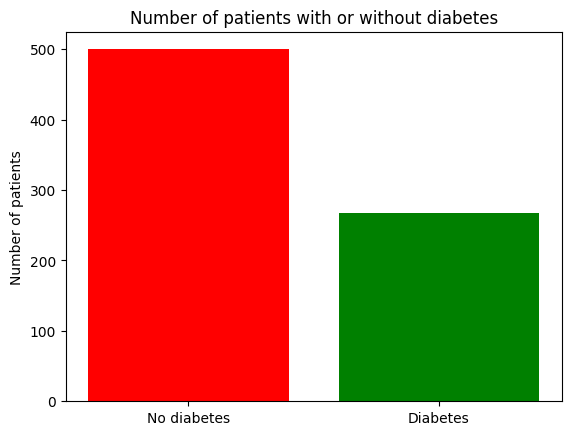

In [ ]:
# 4) Bar chart showing the number of patients with and without diabetes (Outcome)
Results = df["Outcome"].value_counts ()

plt.bar(Results.index, Results.values, color = ["red","green"])
plt.xticks([0,1], ["No diabetes", "Diabetes"])
plt.ylabel("Number of patients")
plt.title("Number of patients with or without diabetes")
plt. show()

# **PART 4**

**1.  What impact do missing values have on data analysis?**

*They reduce the quality and reliability of results, since missing values can bias measures like mean or variance if not handled properly. Removing records causes information loss and lowers statistical power, while ignoring them may lead to errors. Therefore, applying imputation or suitable strategies is essential to ensure trustworthy data analysis.*

**2.  How can we detect and handle outliers in biomedical datasets?**

*Outliers in biomedical data are detected using statistical methods such as the interquartile range or z-scores, and through visualizations like boxplots or scatterplots. They can be removed if they represent errors, replaced with representative values like the median, or transformed. However, if they reflect true biological variability, it is better to keep them and use robust analysis methods that are less affected by extremes.*

**3.  What are some common causes of missing or incorrect data in biomedical studies?**

*Common causes include human error in data entry, faulty sensors or devices during measurements, patients not following medical procedures, or incomplete records due to lost follow-ups. Additionally, some variables may be intentionally omitted to protect privacy. Understanding these causes helps determine whether missing data should be imputed, corrected, or excluded.*

**4.  How does normalizing data improve the performance of Machine Learning models?**

*Normalization ensures that all features are on the same scale, typically between 0 and 1, preventing attributes with larger ranges (like glucose levels) from dominating those with smaller ranges (like pedigree function). This improves the stability and convergence speed of algorithms, enhances model accuracy, and ensures fair treatment of all input variables.*

**5.  Why is visualizing data an important step before applying Machine Learning models?**

*Visualization reveals patterns, distributions, correlations, and anomalies in the dataset. It allows researchers to identify potential issues such as skewed data, outliers, or class imbalances before modeling. In biomedical contexts, visualization also makes complex data more interpretable for clinicians and stakeholders, bridging the gap between raw numbers and meaningful medical insights.*

**6.  Why is preprocessing critical when working with medical datasets?**

*Medical datasets often contain missing values, inconsistent entries, and variables with different scales. Preprocessing ensures data quality, consistency, and readiness for analysis. By cleaning, imputing, and normalizing, researchers reduce noise and prevent misleading results, which is crucial when patient outcomes and clinical decisions may depend on the model’s predictions.*

**7.  What ethical concerns should be considered when handling patient data?**

Ethical concerns include ensuring patient privacy, maintaining confidentiality, and complying with regulations such as HIPAA or GDPR. Researchers must also avoid introducing biases that could lead to discriminatory models, ensure transparency in how data is used, and obtain proper consent for data collection. Ultimately, protecting patients’ rights and trust is as important as the technical accuracy of the analysis.
